<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [302]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [303]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [304]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [305]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,597998,2013-04-03,9,6,9,9,1,0.1,6,9,2013,1,0,0,128,0,1
1,597998,2013-04-03,9,6,9,9,1,0.2,6,9,2013,1,0,0,128,4,1
2,597998,2013-04-03,9,6,9,9,1,0.3,6,9,2013,1,0,0,128,5,1
3,597998,2013-04-03,9,6,9,9,1,0.4,6,9,2013,1,0,0,128,5,1
4,597998,2013-04-03,9,6,9,9,1,0.5,6,9,2013,1,0,0,128,5,1


In [306]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [307]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [308]:
# new is the training set and t is the test set

In [309]:
tnew = t.drop(t[(t.over <= 15.5) | (t.over >=16.0)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,9,6,9,1,15.6,6,9,1,0,0,98,6
1,9,6,9,2,15.6,9,6,1,0,0,105,4
2,9,6,9,2,15.7,9,6,1,0,0,106,4
3,5,12,12,1,15.6,5,12,1,0,0,106,5
4,5,12,12,2,15.6,12,5,1,0,0,106,3


In [310]:
xnew = new.drop(new[(new.over <=15.5) | (new.over >=16.0)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,15.6,9,5,1,0,0,158,2
1,8,11,11,1,15.6,11,8,0,0,0,169,5
2,8,11,11,2,15.6,8,11,0,0,0,176,3
3,6,10,10,1,15.6,10,6,0,0,0,106,7
4,12,5,12,1,15.6,12,5,0,0,0,114,4


In [311]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [312]:
xnewt = sc.fit_transform(xnew) 
tnewt = sc.fit_transform(tnew)

In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [314]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [315]:
history= model.fit(x=xnewt, y=y1train, epochs=800, 
          validation_data=(tnewt,y1test))

Epoch 1/800
52/52 [==============================] - 1s 5ms/step - loss: 26225.7109 - val_loss: 23129.5488
Epoch 2/800
52/52 [==============================] - 0s 3ms/step - loss: 25194.1641 - val_loss: 21293.8672
Epoch 3/800
52/52 [==============================] - 0s 3ms/step - loss: 21321.3672 - val_loss: 14667.0010
Epoch 4/800
52/52 [==============================] - 0s 2ms/step - loss: 12664.8486 - val_loss: 4635.6782
Epoch 5/800
52/52 [==============================] - 0s 3ms/step - loss: 8936.3408 - val_loss: 2470.6316
Epoch 6/800
52/52 [==============================] - 0s 3ms/step - loss: 7503.1768 - val_loss: 1982.0229
Epoch 7/800
52/52 [==============================] - 0s 3ms/step - loss: 7685.0903 - val_loss: 1988.7439
Epoch 8/800
52/52 [==============================] - 0s 2ms/step - loss: 7273.8501 - val_loss: 1787.1516
Epoch 9/800
52/52 [==============================] - 0s 3ms/step - loss: 7638.9824 - val_loss: 1960.1771
Epoch 10/800
52/52 [============================

In [316]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


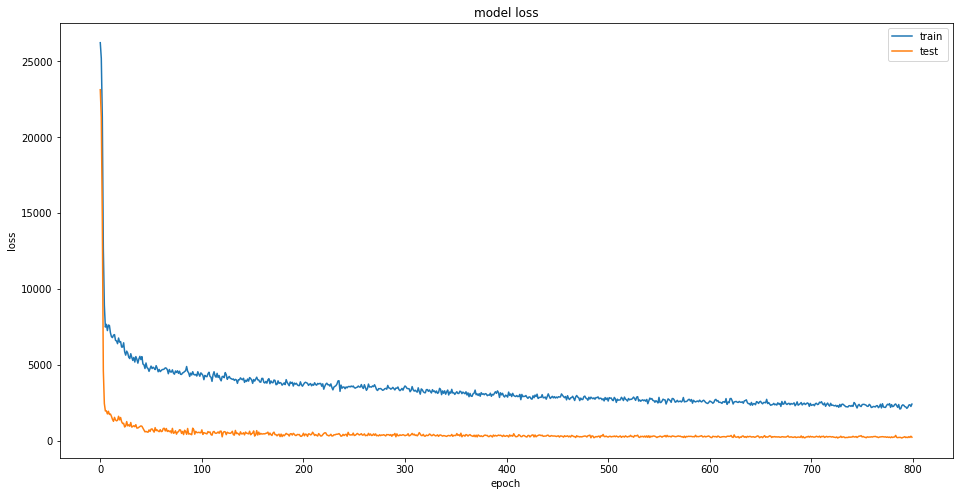

In [317]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [318]:
y1test = y1test.ravel()

In [319]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,125.980087,128
1,128.622604,129
2,129.683136,129
3,134.773911,156
4,131.953888,154
5,125.475586,126
6,121.699417,104
7,175.500061,165
8,150.844482,160
9,133.790466,148


In [320]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [321]:
custom_accuracy(sample['Actual'] , sample['Predict'],10)

46.55172413793103

In [322]:
# sample.to_csv('sample.csv')

In [323]:
# try1 = sample[sample.Actual == 128]
# try1.head()

In [324]:
# try1.shape[0]

In [325]:
# try1.sum()

In [326]:
# (try1.sum())/try1.shape[0]

In [327]:
# try2 = sample[sample.Actual == 129]
# (try2.sum())/try2.shape[0]

In [328]:
# try2 = sample[sample.Actual == 156]
# result = (try2.sum())/try2.shape[0]

In [329]:
# result

In [330]:
# res2 = result.values.reshape(1,2)

In [331]:
# res2

In [332]:
# res2.shape

In [333]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [334]:
ar1 = sample['Actual'].unique()

In [335]:
results = pd.DataFrame()

In [336]:
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [337]:
results.head()

,0,1
0,125.980087,128.0
0,128.888652,129.0
0,134.773911,156.0
0,140.226095,154.0
0,125.275497,126.0


In [338]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [339]:
results.reset_index(drop = True)

,Predict,Actual
0,125.980087,128.0
1,128.888652,129.0
2,134.773911,156.0
3,140.226095,154.0
4,125.275497,126.0
...,...,...
76,170.900848,190.0
77,121.699417,113.0
78,151.376877,172.0
79,140.771851,134.0


In [340]:
results.tail()

,Predict,Actual
0,170.900848,190.0
0,121.699417,113.0
0,151.376877,172.0
0,140.771851,134.0
0,169.223175,192.0


In [341]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

51.85185185185185


In [342]:
# results.info()

In [343]:
# results['Actual']

take epochs = 90 next time

In [344]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [345]:
sets = tests.drop(tests[(tests.over <= 15.5) | (tests.over >=16.0)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,15.6,12,5,1,0,0,135,4
1,12,5,5,2,15.6,5,12,1,0,0,121,5
2,11,6,6,1,15.6,11,6,1,0,0,143,6
3,11,6,6,2,15.6,6,11,1,0,0,158,1
4,11,6,6,2,15.7,6,11,1,0,0,158,1


In [346]:
yt1 = yt1.ravel()

In [347]:
xs = sc.fit_transform(sets)

In [348]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,159.001709,159
1,133.299911,160
2,164.539856,188
3,163.789246,190
4,163.153564,190
5,174.079544,187
6,142.228882,177
7,142.724731,177
8,143.154312,177
9,192.319214,221


In [349]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [350]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

38.23529411764706
